<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/Template/Redistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
### RFM
rf = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/db_Exercicio_RFM.csv")
rf

,Unnamed: 0,CUSTOMER_ID,STORE_ID,PRODUCT_ID,AMOUNT,DATE
0,1,95595791691,409,196282,8.98,2020-01-01 00:14:41 UTC
1,2,8814812624,62,136956,0.00,2020-01-01 00:10:16 UTC
2,3,38552620634,408,329,9.98,2020-01-01 00:08:29 UTC
3,4,11561694614,405,104089,7.99,2020-01-01 00:06:10 UTC
4,5,1216506698,62,196180,11.96,2020-01-01 00:05:30 UTC
...,...,...,...,...,...,...
92289,92290,10264569679,417,160178,2.15,2019-11-08 10:29:32 UTC
92290,92291,74199480625,405,194991,2.99,2019-11-08 10:29:22 UTC
92291,92292,60400722615,415,185621,4.30,2019-11-08 10:27:06 UTC
92292,92293,3623837660,65,193506,6.29,2019-11-08 10:16:58 UTC


<Axes: xlabel='sum', ylabel='count'>

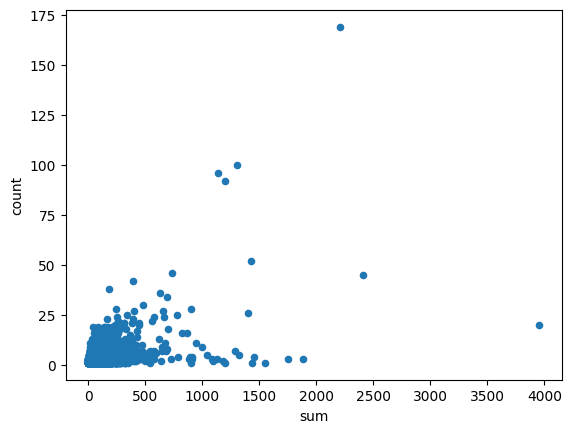

In [3]:
DFagg = rf.groupby(by=["CUSTOMER_ID"])["AMOUNT"].agg(['sum','count'])
DFagg.plot.scatter(x='sum', y='count')

In [30]:
x = DFagg['sum'].values
y = DFagg['count'].values
# https://stackoverflow.com/a/20107592/3015186
# Answer by Joel Kington

xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

#ax.scatter(x, y, c=z, s=100, edgecolor='')

In [23]:
xy
#from scipy.stats import gaussian_kde
#y = np.vstack([x, y])

array([[17.82],
       [13.8 ],
       [38.79],
       ...,
       [ 3.  ],
       [ 1.  ],
       [ 1.  ]])

array([[<Axes: title={'center': 'count'}>]], dtype=object)

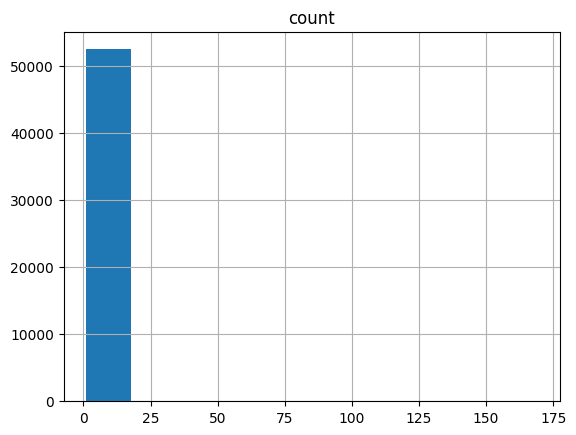

In [5]:
DFagg.hist('count')


array([[<Axes: title={'center': 'sum'}>]], dtype=object)

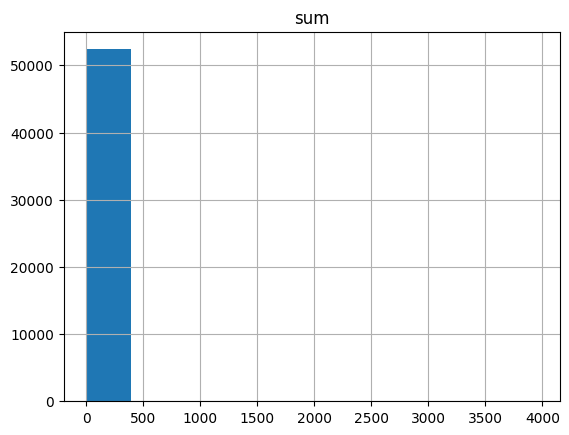

In [6]:
DFagg.hist('sum')

In [26]:
!pip install datashader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 42.7 MB/s eta 0:00:00


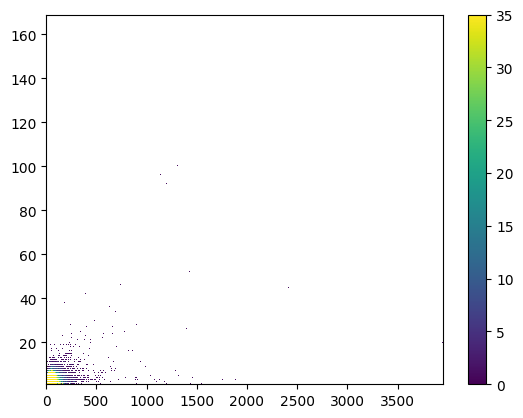

In [31]:
import datashader as ds
from datashader.mpl_ext import dsshow
import pandas as pd
import matplotlib.pyplot as plt

def using_datashader(ax, x, y):

    df = pd.DataFrame(dict(x=x, y=y))
    dsartist = dsshow(
        df,
        ds.Point("x", "y"),
        ds.count(),
        vmin=0,
        vmax=35,
        norm="linear",
        aspect="auto",
        ax=ax,
    )

    plt.colorbar(dsartist)


fig, ax = plt.subplots()
using_datashader(ax, x, y)
plt.show()

In [32]:
x_log = np.log(x)
y_log = np.log(y)

<ipython-input-32-c80ff9ef9606>:1: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(x)


In [49]:
x[x==0]=0.0001
x_log = np.log(x)
y_log = np.log(y)

array([[<Axes: title={'center': 'logcount'}>]], dtype=object)

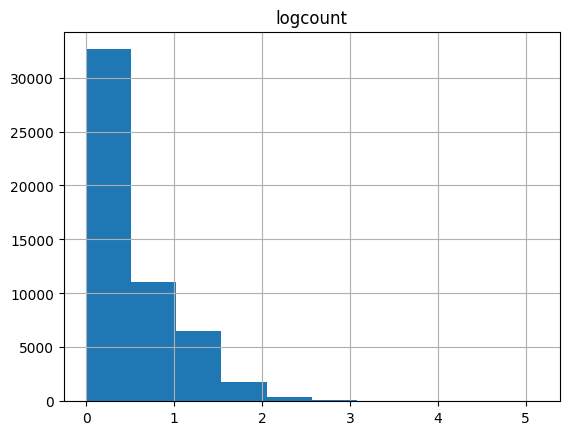

In [51]:
DFagg['logcount'] = np.log(DFagg['count'])
DFagg.hist('logcount')

array([[<Axes: title={'center': 'logsum'}>]], dtype=object)

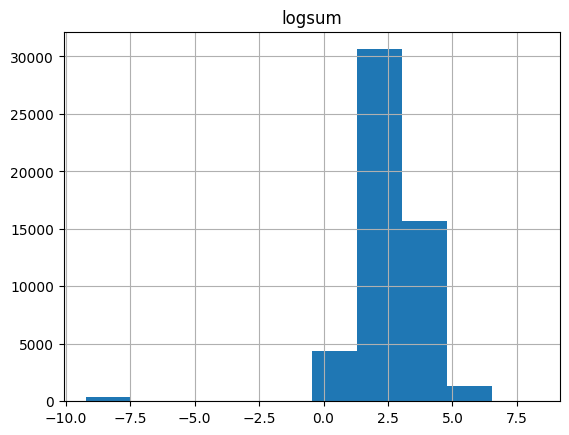

In [52]:
DFagg['logsum'] = np.log(DFagg['sum'])
DFagg.hist('logsum')